___
# PROJETO 1

## <font color='red'>Francisco Ciol Rodrigues Aveiro</font>
___

## <font color='blue'>Verificaççao da qualidade de vida dos aposentados </font>

## Introdução

A intenção dessa análise é demonstrar em quais em quais características certo grupo de aposentados está melhor(ou pior ou
igual) que não aposentados maiores de 15 anos.
A análise levará em conta a renda dos dois grupos assim como escolaridade, uso de internet e situação censitária

___
## Começando a mexer com os dados
*Pode pular essa parte

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Francisco\Documents\Insper\Ciencia dos Dados\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
#pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

In [5]:
estrutura.columns
pnad2014.columns = estrutura.iloc[:,0]


In [6]:
pnad2014["regiao"] = pd.Series(len(pnad2014))

In [7]:
pnad2014.regiao[pnad2014.UF==35] = "Sudeste"
pnad2014.regiao[pnad2014.UF==31] = "Sudeste"
pnad2014.regiao[pnad2014.UF==32] = "Sudeste"
pnad2014.regiao[pnad2014.UF==33] = "Sudeste"
pnad2014.regiao[pnad2014.UF==41] = "Sul"
pnad2014.regiao[pnad2014.UF==42] = "Sul"
pnad2014.regiao[pnad2014.UF==43] = "Sul"
pnad2014.regiao[pnad2014.UF==11] = "Norte"
pnad2014.regiao[pnad2014.UF==12] = "Norte"
pnad2014.regiao[pnad2014.UF==13] = "Norte"
pnad2014.regiao[pnad2014.UF==14] = "Norte"
pnad2014.regiao[pnad2014.UF==15] = "Norte"
pnad2014.regiao[pnad2014.UF==16] = "Norte"
pnad2014.regiao[pnad2014.UF==17] = "Norte"
pnad2014.regiao[pnad2014.UF==21] = "Norte"
pnad2014.regiao[pnad2014.UF==22] = "Nordeste"
pnad2014.regiao[pnad2014.UF==23] = "Nordeste"
pnad2014.regiao[pnad2014.UF==24] = "Nordeste"
pnad2014.regiao[pnad2014.UF==25] = "Nordeste"
pnad2014.regiao[pnad2014.UF==26] = "Nordeste"
pnad2014.regiao[pnad2014.UF==27] = "Nordeste"
pnad2014.regiao[pnad2014.UF==28] = "Nordeste"
pnad2014.regiao[pnad2014.UF==29] = "Nordeste"
pnad2014.regiao[pnad2014.UF==50] = "CentroO"
pnad2014.regiao[pnad2014.UF==51] = "CentroO"
pnad2014.regiao[pnad2014.UF==52] = "CentroO"
pnad2014.regiao[pnad2014.UF==53] = "CentroO"

C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Francisco\Anaconda3\lib\site-packag

In [8]:
pnad2014.UF = pnad2014.UF.astype('category')
pnad2014.UF.cat.categories = ('Rondônia','Acre','Amazonas','Roraima','Para','Amapa','Tocantins','Mananhao','Piaui','Ceara','Rio Grande do Norte','Paraiba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espirito Santo','Rio de Janeiro','Sao Paulo','Parana','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goias','Distrito Federal')

pnad2014.V4743 = pnad2014.V4743.astype('category')
pnad2014.V4743.cat.categories = ('Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Sem declaração','nao Aplicavel')

pnad2014.V4728 = pnad2014.V4728.astype('category')
pnad2014.V4728.cat.categories = ('Urbana - Cidade ou vila, área urbanizada','Urbana - Cidade ou vila, área não-urbanizada','Urbana - Área urbana isolada','Rural - Aglomerado rural de extensão urbana','Rural - Aglomerado rural, isolado, povoado','Rural - Aglomerado rural, isolado, núcleo','Rural - Aglomerado rural, isolado, outros aglomerados','Rural – Zona rural exclusive aglomerado rural ')

In [34]:

pnad2014.V6007 = pnad2014.V6007.astype('category')
pnad2014.V6007.cat.categories = ('Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.')

In [70]:
pnad2014.V9122 = pnad2014.V9122.astype('category')
pnad2014.V9122.cat.categories = ('Aposentado','Nao_Aposentado')

pnad2014.V0302 = pnad2014.V0302.astype('category')
pnad2014.V0302.cat.categories = ('Homem','Mulher')

pnad2014.V0401 = pnad2014.V0401.astype('category')
pnad2014.V0401.cat.categories = ('Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico','Parente do empregado doméstico')

In [71]:
pnad2014.V06111 = pnad2014.V06111.astype('category')
pnad2014.V06111.cat.categories = ('Usa Internet','Nao Usa Internet ')


maioresde15 = pnad2014[pnad2014.V8005 >= 15]
aposentadosPrev = maioresde15[maioresde15.V9122 == 'Aposentado']
nAposentadosPrev = maioresde15[maioresde15.V9122 == 'Nao_Aposentado']

In [72]:
SalarioPCapitaApos = aposentadosPrev.V1258.median()
SalarioPCapitaNA = nAposentadosPrev.V1258.median()
mediaidadeapos = aposentadosPrev.V8005.median()
mediaidadenapos = nAposentadosPrev.V8005.median()


# Começo da avaliação dos dados 


## Análise de quantidade e distribuição dos grupos no país

Numero Absoluto de:
Aposentados VS Não Aposentados


Nao_Aposentado    273118
Aposentado         38643
Name: V9122, dtype: int64

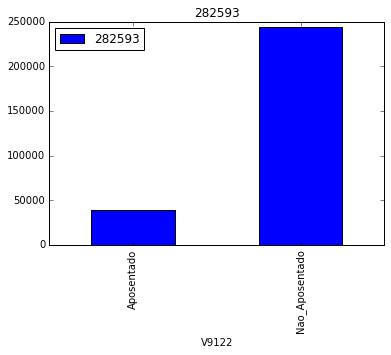

In [73]:
pd.crosstab(maioresde15.V9122,len(maioresde15)).plot(kind='bar',legend='True',subplots="True")
print("""Numero Absoluto de:
Aposentados VS Não Aposentados""")
pnad2014.V9122.value_counts()


Quantidade de Aposentados e não aposentados por Regiões do País


V9122,Aposentado,Nao_Aposentado
regiao,,
CentroO,3255,26161
Nordeste,9979,64165
Norte,4921,43499
Sudeste,12537,73186
Sul,7941,36949


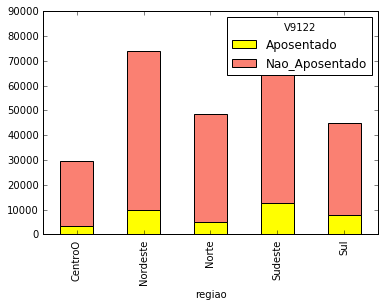

In [97]:
regINSS = pd.crosstab(maioresde15.regiao,maioresde15.V9122)
regINSS.plot.bar(color=('yellow', 'salmon'), stacked=True,legend=True)
print('Quantidade de Aposentados e não aposentados por Regiões do País')
regINSS

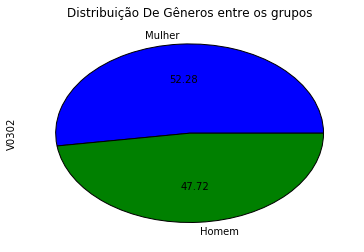

In [75]:
sexo = maioresde15.V0302.value_counts()
sexoAp = aposentadosPrev.V0302.value_counts()
sexoNAp = nAposentadosPrev.V0302.value_counts()

sexo.plot(kind="pie",autopct="%0.2f",legend=False,title="Distribuição De Gêneros entre os grupos")


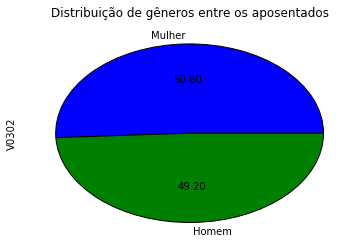

In [76]:
sexoAp.plot(kind="pie",autopct="%0.2f",legend=False,title='Distribuição de gêneros entre os aposentados')


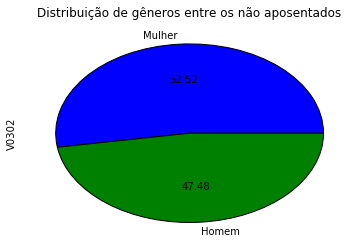

In [77]:
sexoNAp.plot(kind="pie",autopct="%0.2f",legend=False,title='Distribuição de gêneros entre os não aposentados')

## Análise de renda entre aposentados e não aposentados

Faixa de rendimento familiar Per Capita


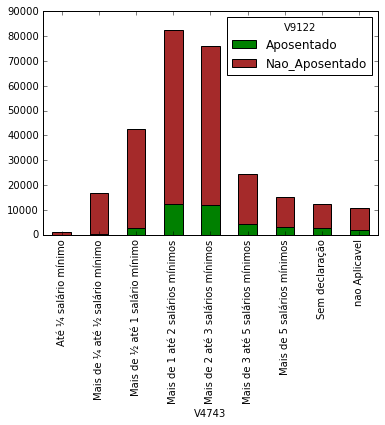

In [78]:
print('Faixa de rendimento familiar Per Capita')
faxrend = pd.crosstab(maioresde15.V4743,maioresde15.V9122)
faxrend.plot.bar(color=('green','brown'), stacked=True)

Faixas de Rendimento familiar Per Capita domiciliar dos Aposentados pela quantidade de aposentados
Mediana do rendimento mensal dos aposentados: R$ 3500.0


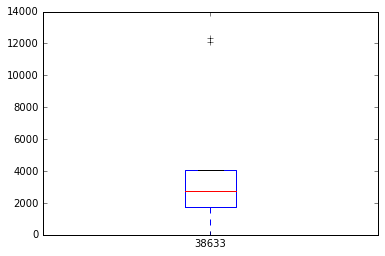

In [79]:
faxrend1 = pd.crosstab(aposentadosPrev.V4743,len(aposentadosPrev))
faxrend1.plot.box(subplots = True, legend=True)
print('Faixas de Rendimento familiar Per Capita domiciliar dos Aposentados pela quantidade de aposentados')
print('Mediana do rendimento mensal dos aposentados: R$',SalarioPCapitaApos)

Faixas de Rendimento familiar Per Capita domiciliar dos Não-Aposentados pela quantidade de não aposentados
Mediana do rendimento mensal dos não-aposentados: R$ 724.0


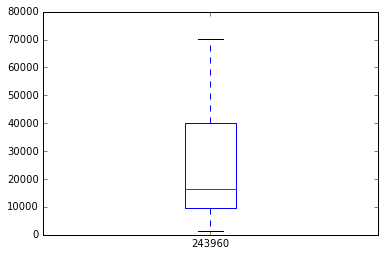

In [80]:
faxrend2 = pd.crosstab(nAposentadosPrev.V4743,len(nAposentadosPrev))
faxrend2.plot.box(subplots = True, legend=True)
print('Faixas de Rendimento familiar Per Capita domiciliar dos Não-Aposentados pela quantidade de não aposentados')
print('Mediana do rendimento mensal dos não-aposentados: R$',SalarioPCapitaNA)

## Análise do nível de educação dos grupos

Nivel de Educação dos aposentados e dos não aposentados


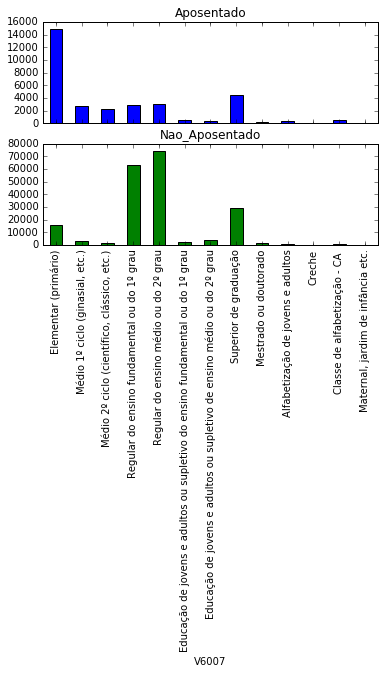

In [81]:
educ = pd.crosstab(maioresde15.V6007,maioresde15.V9122)
educ.plot.bar(subplots = True,legend = False)
print('Nivel de Educação dos aposentados e dos não aposentados')

## Análise da Situação de Moradia dos dois grupos

Situação de Moradia dos grupos


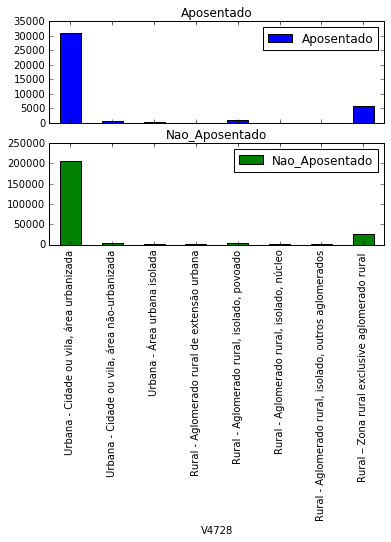

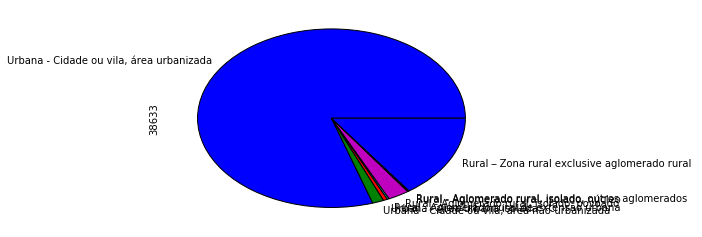

In [82]:
morad = pd.crosstab(maioresde15.V4728,maioresde15.V9122)
morad.plot.bar(subplots=True, legend=True)

morad2 = pd.crosstab(aposentadosPrev.V4728,len(aposentadosPrev))
morad2.plot.pie(subplots=True, legend=False)

print('Situação de Moradia dos grupos')

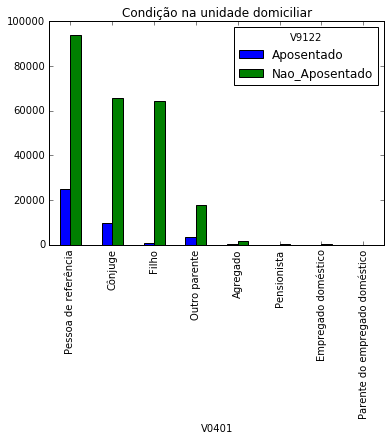

In [85]:
situaMor = pd.crosstab(maioresde15.V0401,maioresde15.V9122)
situaMor.plot.bar(title="Condição na unidade domiciliar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251042A6518>], dtype=object)

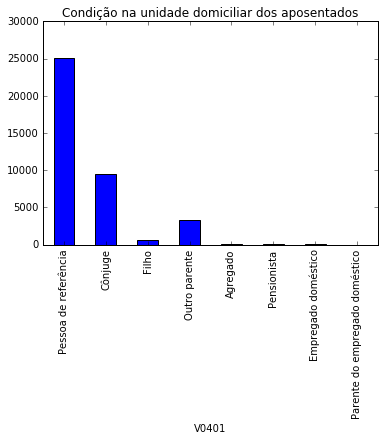

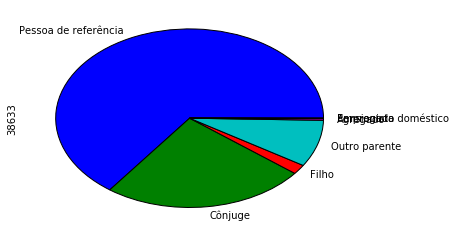

In [93]:
situaMorAp = pd.crosstab(aposentadosPrev.V0401,len(aposentadosPrev.V9122))
situaMorAp.plot.bar(title="Condição na unidade domiciliar dos aposentados",legend=False)
situaMorAp.plot.pie(subplots=True,legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002510447E5F8>], dtype=object)

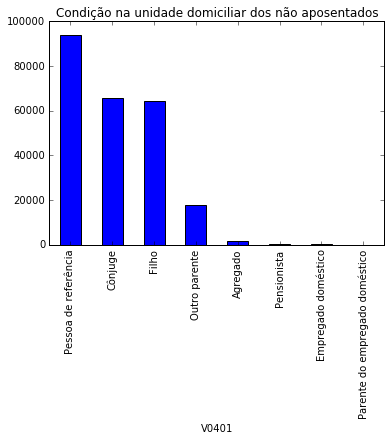

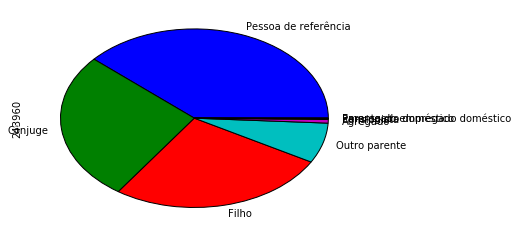

In [95]:
situaMorNAp = pd.crosstab(nAposentadosPrev.V0401,len(nAposentadosPrev.V9122))
situaMorNAp.plot.bar(title="Condição na unidade domiciliar dos não aposentados",legend=False)
situaMorNAp.plot.pie(subplots=True,legend=False)

## Avaliação em Relação ao uso de Internet

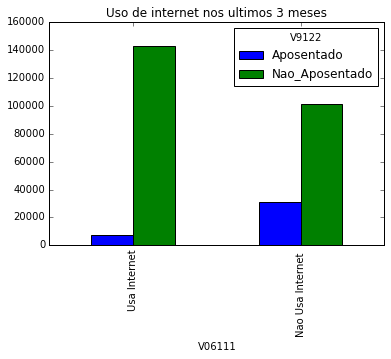

In [60]:
inter = pd.crosstab(maioresde15.V06111,maioresde15.V9122)
inter.plot.bar(title = ('Uso de internet nos ultimos 3 meses'))


___
## Conclusão 

## Em relação à Distribuição no país:
   Vemos que a quantidade de aposentados pelo INSS e a de não aposentados é bem parecida qualitativamente. Mas a quantidade de não aposentados no pais é muito maior que a de aposentados. Os dois grupos analisados se concentram principalmente no Sudeste e no Nordeste do país.
   Percebe-se tambem, pelos gráficos, que tanto aposentados como não aposentados se concentram principalmente nas áreas urbanas.
e que a distribuição de gêneros nos dois grupos é de praticamente 50% homens e 50% mulheres, tendêndo a ter mais mulheres
    
## Em relação à situação da moradia:
   Os aposentados demonstram que são principalmente os donos das residencias onde moram. Logo após esses vêm os que moram com os cônjuge.
   Já os não aposentados, apesar da maioria morar em casas próprias, a disparidade entre esses e as outras condições não é tão grande quanto a dos aposentados. Mesmo sendo ,como os aposentados, casa do cônjuge a segunda condição mais comum, a condição de filho do dono tem praticamente mesma quantidade de não aposentados que ela.
    
## Em relação à educação:
   Na área de educação que tem uma das maiores diferênças entre os dois grupos. A maioria dos não aposentados completou o segundo grau regularmente. Já os aposentados, em sua grande maioria, somente completou o primário.
   
## Em relação aos salários:
   Após calcular as medianas dos salários dos dois grupos e plotar os gráficos, percebemos que apesar da mediana dos salários dos aposentados ser maior(3500 reais), os não aposentados tem um range maior de salário médios. Mesmo com uma mediana dos salários de 724 reais, os salários do segundo grupo variam de forma que muitos dos nao aposentados ganhem mais que os aposentados.
   
## Em relação ao uso de Internet:
   O uso de Internet pelos dois grupos distoa claramente pois a maioria dos não aposentados usou internet nos três meses anteriores ao censo, enquanto os aposentados, em maioria, não utilizaram internet nos três meses anteriores ao censo.